In [2]:
import mysql.connector
import datetime
import pandas as pd

In [3]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

# Import consumption data

In [4]:
cnx = mysql.connector.connect(user='puser', password='sj5$mfD&k37z1c',
                              host='93.88.227.8',
                              database='encompass_model')
#set the cursor
cursor = cnx.cursor()


# First let's select the users

In [5]:
# select only residential users
query = ("SELECT t1.oid, t1.username FROM encompass_model.user t1 "+
"INNER JOIN encompass_model.dwelling t2 "+
"ON t2.oid = t1.dwelling_oid "+
"INNER JOIN encompass_model.building t3 "+
"ON t2.building_oid = t3.oid "+
"WHERE t3.building_type_oid != 4 and t3.building_type_oid != 5 ORDER BY t1.oid")
cursor.execute(query)
userlist =[x for x in cursor.fetchall()] 



In [6]:
#manually remove users

#problems with user 232, consumption always 0
# problems user 233, too few data samples
#problems with user 321, no data
#user 346 has no baseline!!
#user 361 has also no baseline readings
# 284 and 349 partial baseline
#221 277 and 303 0 in baseline
#from 322 to 326 are test users
to_be_removed =[221, 232, 233, 277, 284, 303, 321, 322, 323, 324, 325, 326, 346, 349, 361]

userlist = [x for x in userlist if x[0] not in to_be_removed]



In [7]:
userlist

[(214, 'plnkn'),
 (215, 'jrgnbld'),
 (216, 'thms.br'),
 (217, 'thms.br17'),
 (218, 'M.bs96'),
 (219, 'frnk-d.bck'),
 (222, 'mn-bnngl'),
 (223, 'ls-brndl'),
 (224, 'mrslv_bgl'),
 (225, 'fmly-dsslr'),
 (226, 'dllrts'),
 (227, 'Jhnns.dcks'),
 (228, 'hlgr.dnnngr'),
 (229, 'btsch.f'),
 (230, 'nbckrm'),
 (231, 'kh.ppln'),
 (234, 'lthr_hnn'),
 (235, 'rckdg1266'),
 (236, 'njgklr'),
 (238, 'd.gpprt'),
 (240, 'Brnsbn'),
 (242, 'kyhllmnn'),
 (243, 'rlf.hrschlch'),
 (244, 'dgr_hfmnn'),
 (245, 'm-s.hmmr'),
 (247, 'Ssnn.httnr64'),
 (248, 'jkchr'),
 (249, 'Kl-Chrstn'),
 (250, 'sbn.ktzngr'),
 (251, 'wk.kln'),
 (252, 'cldhrstknr'),
 (253, 'khl.hm'),
 (254, 'H1.Khlr'),
 (255, 'jn_klb'),
 (256, 'hbmkrg'),
 (257, 'pmpn-8-z'),
 (258, 'bnckhn'),
 (259, 'mnfrd-khnl'),
 (260, 'knnll.grg'),
 (261, 'Jsn.krschnr'),
 (262, 'bckr-lhr'),
 (263, 'lldwg'),
 (264, 'crdlltz46'),
 (266, 'Mcmyr'),
 (268, 'hsvrwltng-myr'),
 (269, 'mx-stphn'),
 (271, '.mllrsyl'),
 (272, 'nf1'),
 (273, 'mschblt'),
 (274, 'ls.nb'),
 (275, 'n

In [8]:
len(userlist)

115

# Load the Baseline

Now let's load the baseline

In [9]:
basedf_list=[]
i=0
for id in userlist:

    #prepare the query
    query = ("SELECT month, total_consumption, smart_meter_oid "+
            "FROM encompass_model.baseline t1 "+
            "INNER JOIN encompass_model.smart_meter t2 "+
            "ON t1.smart_meter_oid = t2.oid "+
            "INNER JOIN encompass_model.user t3 "+
            "ON t2.dwelling_oid = t3.dwelling_oid " +
            "AND t3.oid = %s" % id[0])
    query = query + " WHERE month >='2017-05-31' and month <='2018-04-30'"

    print(id , '.', end='')

    #smart_meter_oid = 131
    #meter_start = datetime.date(2017, 11, 1)
    #meter_end = datetime.date(2018, 12, 2)

    #execute the query
    cursor.execute(query)

    #for row in cursor:
    #    print(row)
    
    # load the dataframe
    df_base = pd.DataFrame(cursor.fetchall())
    
    df_base.columns = cursor.column_names
    #df.keys()
    df_base=df_base.set_index('month')
    df_base.index=pd.to_datetime(df_base.index)
    df_base=df_base.drop(['smart_meter_oid'], axis=1)
    
    if (id==306):
        print(df_base)
    
        
    basedf_list.append(df_base)

    if (id==306):
        print(df_base)

    i=i+1



(214, 'plnkn') .(215, 'jrgnbld') .(216, 'thms.br') .(217, 'thms.br17') .(218, 'M.bs96') .(219, 'frnk-d.bck') .(222, 'mn-bnngl') .(223, 'ls-brndl') .(224, 'mrslv_bgl') .(225, 'fmly-dsslr') .(226, 'dllrts') .(227, 'Jhnns.dcks') .(228, 'hlgr.dnnngr') .(229, 'btsch.f') .(230, 'nbckrm') .(231, 'kh.ppln') .(234, 'lthr_hnn') .(235, 'rckdg1266') .(236, 'njgklr') .(238, 'd.gpprt') .(240, 'Brnsbn') .(242, 'kyhllmnn') .(243, 'rlf.hrschlch') .(244, 'dgr_hfmnn') .(245, 'm-s.hmmr') .(247, 'Ssnn.httnr64') .(248, 'jkchr') .(249, 'Kl-Chrstn') .(250, 'sbn.ktzngr') .(251, 'wk.kln') .(252, 'cldhrstknr') .(253, 'khl.hm') .(254, 'H1.Khlr') .(255, 'jn_klb') .(256, 'hbmkrg') .(257, 'pmpn-8-z') .(258, 'bnckhn') .(259, 'mnfrd-khnl') .(260, 'knnll.grg') .(261, 'Jsn.krschnr') .(262, 'bckr-lhr') .(263, 'lldwg') .(264, 'crdlltz46') .(266, 'Mcmyr') .(268, 'hsvrwltng-myr') .(269, 'mx-stphn') .(271, '.mllrsyl') .(272, 'nf1') .(273, 'mschblt') .(274, 'ls.nb') .(275, 'nn.nld') .(276, 'Chrstph_') .(278, 'thms_pfffr') .(2

In [10]:
basedf_list[95]

,total_consumption
month,
2017-06-30,250.000
2017-07-31,462.080
2017-08-31,239.977
2017-09-30,205.098
2017-10-31,307.841
2017-11-30,312.582
2017-12-31,367.882
2018-01-31,328.847
2018-02-28,252.713


In [11]:
# for some weird reason, the baseline for a user  is messed up during the append process
basedf_list[79]

,total_consumption
month,
2017-05-31,42.362
2017-06-30,16.252
2017-07-31,37.782
2017-08-31,52.782
2017-09-30,118.450
2017-10-31,311.852
2017-11-30,452.301
2017-12-31,499.028
2018-01-31,498.760


In [12]:
basedf_list[79]=basedf_list[79][:12]

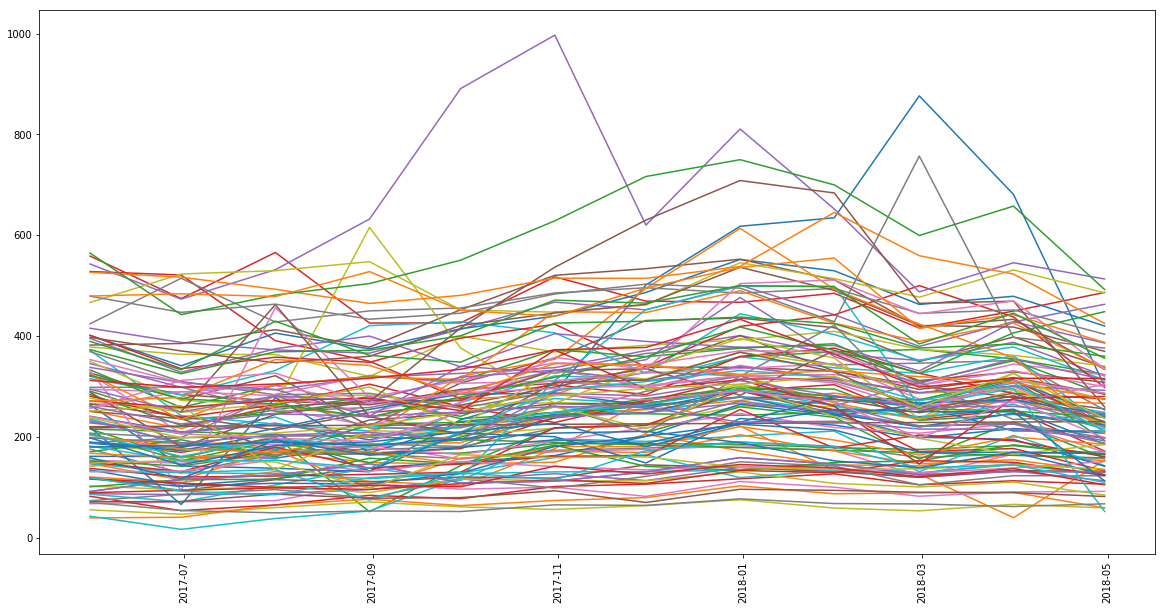

In [13]:
fig=plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
for i in range(len(basedf_list)):
    plt.plot(basedf_list[i])

In [14]:
len(basedf_list)

115

In [15]:
len(userlist)

115

In [16]:
basedf_list[79]

,total_consumption
month,
2017-05-31,42.362
2017-06-30,16.252
2017-07-31,37.782
2017-08-31,52.782
2017-09-30,118.450
2017-10-31,311.852
2017-11-30,452.301
2017-12-31,499.028
2018-01-31,498.760


In [17]:
basedf = pd.DataFrame(({'user':userlist, 'cons':basedf_list}))

In [18]:
pickle.dump(basedf, open('base_SHF.pck','wb'))

# Load Consumption

In [19]:
dataframe_list =[]

for id in userlist:

    #prepare the query
    query = ("SELECT t1.datetime, t1.consumption, t3.username, t1.smart_meter_oid "+
            "FROM encompass_model.meter_consumption t1 "+
            "INNER JOIN encompass_model.smart_meter t2 "+
            "ON t1.smart_meter_oid = t2.oid "+
            "INNER JOIN encompass_model.user t3 "+
            "ON t2.dwelling_oid = t3.dwelling_oid " +
            "AND t3.oid = %s" % id[0])
    query=query+" WHERE t1.datetime >='2018-06-01' and t1.datetime <='2018-12-31'"
    #print(query)
    print(id ,'.', end='')

    #smart_meter_oid = 131
    #meter_start = datetime.date(2017, 11, 1)
    #meter_end = datetime.date(2018, 12, 2)

    #execute the query
    cursor.execute(query)

   
    # load the dataframe
    rows = cursor.fetchall()    

    df_cons = pd.DataFrame(rows)
    df_cons.columns = cursor.column_names
    df_cons=df_cons.drop(['username','smart_meter_oid'], axis=1)
    df_cons=df_cons.set_index('datetime')
    df_cons.index=pd.to_datetime(df_cons.index)
    
    dataframe_list.append(df_cons)



(214, 'plnkn') .(215, 'jrgnbld') .(216, 'thms.br') .(217, 'thms.br17') .(218, 'M.bs96') .(219, 'frnk-d.bck') .(222, 'mn-bnngl') .(223, 'ls-brndl') .(224, 'mrslv_bgl') .(225, 'fmly-dsslr') .(226, 'dllrts') .(227, 'Jhnns.dcks') .(228, 'hlgr.dnnngr') .(229, 'btsch.f') .(230, 'nbckrm') .(231, 'kh.ppln') .(234, 'lthr_hnn') .(235, 'rckdg1266') .(236, 'njgklr') .(238, 'd.gpprt') .(240, 'Brnsbn') .(242, 'kyhllmnn') .(243, 'rlf.hrschlch') .(244, 'dgr_hfmnn') .(245, 'm-s.hmmr') .(247, 'Ssnn.httnr64') .(248, 'jkchr') .(249, 'Kl-Chrstn') .(250, 'sbn.ktzngr') .(251, 'wk.kln') .(252, 'cldhrstknr') .(253, 'khl.hm') .(254, 'H1.Khlr') .(255, 'jn_klb') .(256, 'hbmkrg') .(257, 'pmpn-8-z') .(258, 'bnckhn') .(259, 'mnfrd-khnl') .(260, 'knnll.grg') .(261, 'Jsn.krschnr') .(262, 'bckr-lhr') .(263, 'lldwg') .(264, 'crdlltz46') .(266, 'Mcmyr') .(268, 'hsvrwltng-myr') .(269, 'mx-stphn') .(271, '.mllrsyl') .(272, 'nf1') .(273, 'mschblt') .(274, 'ls.nb') .(275, 'nn.nld') .(276, 'Chrstph_') .(278, 'thms_pfffr') .(2

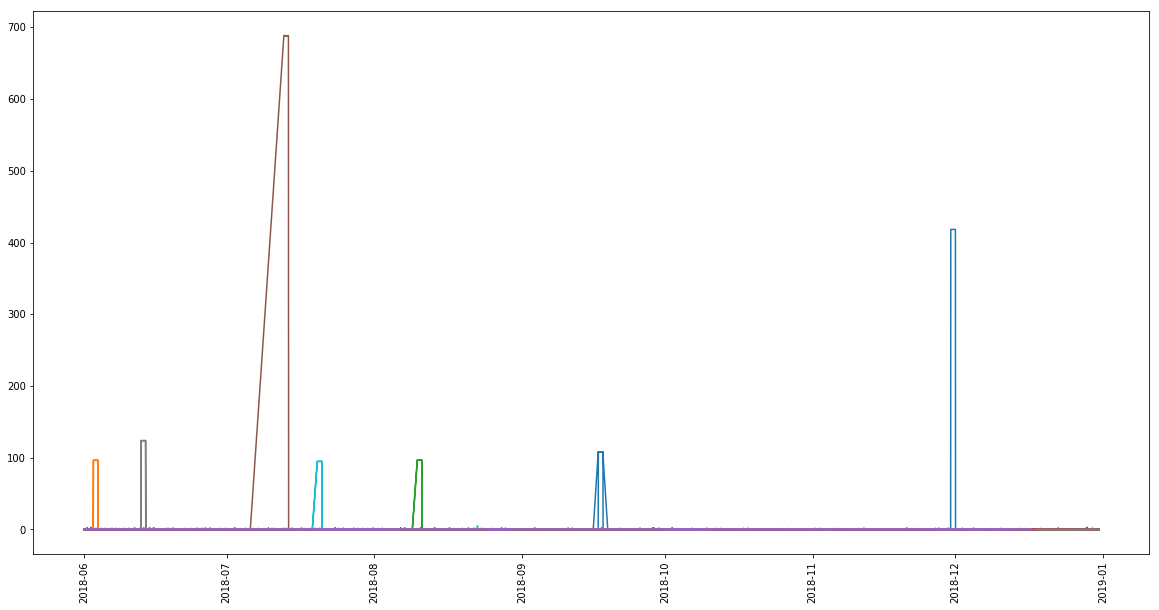

In [20]:
fig=plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
for i in range(len(dataframe_list)):
    plt.plot(dataframe_list[i])

In [21]:
len(dataframe_list)

115

In [22]:
dataf = pd.DataFrame({'user':userlist, 'cons':dataframe_list})

In [38]:
#visualise consumption of user at index 1
#dataf['cons'][1]


[(3, 'plnkn', 214),
 (5, 'thms.br', 216),
 (6, 'thms.br17', 217),
 (7, 'M.bs96', 218),
 (8, 'frnk-d.bck', 219),
 (10, 'h.brkl', 221),
 (11, 'mn-bnngl', 222),
 (12, 'ls-brndl', 223),
 (13, 'mrslv_bgl', 224),
 (15, 'dllrts', 226),
 (16, 'Jhnns.dcks', 227),
 (17, 'hlgr.dnnngr', 228),
 (18, 'btsch.f', 229),
 (19, 'nbckrm', 230),
 (20, 'kh.ppln', 231),
 (22, 'kf2', 233),
 (24, 'rckdg1266', 235),
 (25, 'njgklr', 236),
 (27, 'd.gpprt', 238),
 (29, 'Brnsbn', 240),
 (32, 'rlf.hrschlch', 243),
 (33, 'dgr_hfmnn', 244),
 (34, 'm-s.hmmr', 245),
 (36, 'Ssnn.httnr64', 247),
 (37, 'jkchr', 248),
 (39, 'sbn.ktzngr', 250),
 (40, 'wk.kln', 251),
 (41, 'cldhrstknr', 252),
 (42, 'khl.hm', 253),
 (43, 'H1.Khlr', 254),
 (45, 'hbmkrg', 256),
 (46, 'pmpn-8-z', 257),
 (47, 'bnckhn', 258),
 (48, 'mnfrd-khnl', 259),
 (49, 'knnll.grg', 260),
 (51, 'bckr-lhr', 262),
 (52, 'lldwg', 263),
 (53, 'crdlltz46', 264),
 (55, 'Mcmyr', 266),
 (58, 'mx-stphn', 269),
 (60, '.mllrsyl', 271),
 (62, 'mschblt', 273),
 (63, 'ls.nb'

In [24]:
pickle.dump(dataf, open('cons_SHF.pck','wb'))

In [25]:
# Close the DB connection
cursor.close()
cnx.close()

# Import activity data


In [39]:
cnx = mysql.connector.connect(user='puser', password='sj5$mfD&k37z1c',
                              host='93.88.227.8',
                              database='gamification')
#set the cursor
cursor = cnx.cursor()

load all users

In [40]:
query = ("SELECT t1.user_id, t1.username, t2.oid FROM gamification.user t1 "+
"INNER JOIN encompass_model.user t2 "+
"ON t1.username = t2.username "+
"WHERE t1.groupoid=3")

In [41]:
cursor.execute(query)
userlist = cursor.fetchall()

In [43]:
#remove test users
to_be_removed =[221, 232, 233, 277, 284, 303, 321, 322, 323, 324, 325, 326, 346, 349, 361]

userlist = [x for x in userlist if x[0] not in to_be_removed]
len(userlist)

109

Import weekly logins per user

In [44]:

logindf_list=[]
to_remove=[]

for id in userlist:
    query2=("SELECT a.community_user_user_id,  week(a.timestamp,1), "+
        "DATE_SUB(a.timestamp, INTERVAL WEEKDAY(a.timestamp) DAY) AS week, count(*) "+
        "FROM usage_logger a, user b WHERE a.community_user_user_id = %s " % id[0])
    query2 = query2 +"AND a.event='login' GROUP BY week(a.timestamp,1)" 
    print(id, ".", end=" ")
    cursor.execute(query2)
    rows = cursor.fetchall()
    if (len(rows)>0):
        # print(id[1], id[2])
        # print(id)
        logindf = pd.DataFrame(rows)
        logindf.columns = cursor.column_names
        #df.keys()
        logindf=logindf.set_index('week')
        logindf.index=pd.to_datetime(logindf.index)
        logindf=logindf.drop(['community_user_user_id', 'week(a.timestamp,1)'], axis=1)
        logindf.columns=['logins']
        logindf=logindf.resample('W').sum()
        #df_base=df_base.drop(['smart_meter_oid'], axis=1)
        logindf_list.append(logindf)
    else:
        # note the id to remove from userlist
         #   print('REMOVE',id)
        to_remove.append(id) #  userlist.remove(id)
        
        

(3, 'plnkn', 214) . (5, 'thms.br', 216) . (6, 'thms.br17', 217) . (7, 'M.bs96', 218) . (8, 'frnk-d.bck', 219) . (10, 'h.brkl', 221) . (11, 'mn-bnngl', 222) . (12, 'ls-brndl', 223) . (13, 'mrslv_bgl', 224) . (15, 'dllrts', 226) . (16, 'Jhnns.dcks', 227) . (17, 'hlgr.dnnngr', 228) . (18, 'btsch.f', 229) . (19, 'nbckrm', 230) . (20, 'kh.ppln', 231) . (22, 'kf2', 233) . (24, 'rckdg1266', 235) . (25, 'njgklr', 236) . (27, 'd.gpprt', 238) . (29, 'Brnsbn', 240) . (32, 'rlf.hrschlch', 243) . (33, 'dgr_hfmnn', 244) . (34, 'm-s.hmmr', 245) . (36, 'Ssnn.httnr64', 247) . (37, 'jkchr', 248) . (39, 'sbn.ktzngr', 250) . (40, 'wk.kln', 251) . (41, 'cldhrstknr', 252) . (42, 'khl.hm', 253) . (43, 'H1.Khlr', 254) . (44, 'jn_klb', 255) . (45, 'hbmkrg', 256) . (46, 'pmpn-8-z', 257) . (47, 'bnckhn', 258) . (48, 'mnfrd-khnl', 259) . (49, 'knnll.grg', 260) . (51, 'bckr-lhr', 262) . (52, 'lldwg', 263) . (53, 'crdlltz46', 264) . (55, 'Mcmyr', 266) . (58, 'mx-stphn', 269) . (60, '.mllrsyl', 271) . (62, 'mschblt'

In [45]:
to_remove

[(44, 'jn_klb', 255)]

In [46]:
for elem in to_remove: 
    userlist.remove(elem)

In [47]:
len(userlist)==len(logindf_list)

True

In [48]:
logindf = pd.DataFrame(({'user':userlist, 'logins':logindf_list}))

In [49]:
pickle.dump(logindf, open('logins_SHF.pck','wb'))

Now load the activities

In [50]:
activitydf_list=[]

for id in userlist:
    print(id[1], id[2], end=" ")
    query3=("SELECT b.user_id,  week(a.date,1), DATE_SUB(a.date, INTERVAL WEEKDAY(a.date) DAY) "+
            "AS week, count(*) from action_instance a, user b WHERE a.rank_oid=b.user_id and b.user_id= %s " % id[0])
    query3 = query3 +" GROUP BY week(a.date,1)" 
    #print(query3)
    cursor.execute(query3)
    
    activitydf = pd.DataFrame(cursor.fetchall())
    #don't import column names, else problems later
    activitydf.columns = cursor.column_names
    #df.keys()
    activitydf=activitydf.set_index('week') #corresponds to 'week'
    activitydf.index=pd.to_datetime(activitydf.index)
    activitydf=activitydf.drop(['user_id', 'week(a.date,1)'], axis=1)
    activitydf.columns=['activity']
    activitydf=activitydf.resample('W').sum()
    
    activitydf_list.append(activitydf)




plnkn 214 thms.br 216 thms.br17 217 M.bs96 218 frnk-d.bck 219 h.brkl 221 mn-bnngl 222 ls-brndl 223 mrslv_bgl 224 dllrts 226 Jhnns.dcks 227 hlgr.dnnngr 228 btsch.f 229 nbckrm 230 kh.ppln 231 kf2 233 rckdg1266 235 njgklr 236 d.gpprt 238 Brnsbn 240 rlf.hrschlch 243 dgr_hfmnn 244 m-s.hmmr 245 Ssnn.httnr64 247 jkchr 248 sbn.ktzngr 250 wk.kln 251 cldhrstknr 252 khl.hm 253 H1.Khlr 254 hbmkrg 256 pmpn-8-z 257 bnckhn 258 mnfrd-khnl 259 knnll.grg 260 bckr-lhr 262 lldwg 263 crdlltz46 264 Mcmyr 266 mx-stphn 269 .mllrsyl 271 mschblt 273 ls.nb 274 Chrstph_ 276 rt.mln 277 thms_pfffr 278 rlnd.pfrnzngr77.24 279 rnrh2014 280 Brbr.rmlr 281 mchlrmg 282 cj.rgr 283 fm3 284 l.rmpl 285 kh-schd 286 schmdt-hssfrt 288 hns.schmdr 289 ntt.Schndr 291 hns 292 chrstphschrmm82 293 nschhmnn 294 Ndj.Sdl 295 brgtsmn1 296 phlpp-stpf 298 stgmr-hssfrt 299 jn.strbl 300 Rswth.Sthlfldr 301 hnz.sttzln 302 thrstnsckfll 303 byrlxndr 304 mchl.trpp 305 rnr 306 vtngrbr 307 Grld.Vrnks 308 rmnd 309 thms.wlsch 311 gw60 313 cw84 314 jln

In [51]:
len(activitydf_list)==len(userlist)


True

In [52]:
activitydf = pd.DataFrame(({'user':userlist, 'activity':activitydf_list}))

In [53]:
activitydf['activity'][8].head()

,activity
week,
2018-06-17,56
2018-06-24,27
2018-07-01,47
2018-07-08,0
2018-07-15,8


In [54]:
pickle.dump(activitydf, open('activity_SHF.pck','wb'))

In [55]:
# Close the DB connection
cursor.close()
cnx.close()

# Import Sensor data

## Import the temperature

In [ ]:
temperature_df_list =[]

for id in user_id:

    date='2018-6-1'
    #prepare the query
    query = ("SELECT u.oid AS user_oid, u.username AS username, "+
             "d.oid AS dwelling_oid, dr.oid AS room_id, ich.datetime AS datetime "+
             "FROM encompass_model.indoor_conditions_temperature AS ich, "+
             "dwelling_room AS dr, dwelling AS d, user AS u "+
             "WHERE dr.dwelling_oid = d.oid AND u.dwelling_oid = d.oid AND ich.dwelling_room_oid = dr.oid "+
             "AND datetime >= %s "+
             "AND  u.oid = %s" % date, id)
    print(id ,'.', end='')
    #print(query)

    #smart_meter_oid = 131
    #meter_start = datetime.date(2017, 11, 1)
    #meter_end = datetime.date(2018, 12, 2)

    #execute the query
    cursor.execute(query)

   
    # load the dataframe
    rows = cursor.fetchall()    

    df_temp = pd.DataFrame(rows)
    df_temp.columns = cursor.column_names
    df_temp=df_temp.drop(['username'], axis=1)
    df_temp=df_temp.set_index('datetime')
    df_temp.index=pd.to_datetime(df_temp.index)
    
    temperature_df_list.append(df_temp)

tempdf['value'][0].head()

In [ ]:
cursor.close()
cnx.close()

# Import user profile data

In [14]:
cnx = mysql.connector.connect(user='puser', password='sj5$mfD&k37z1c',
                              host='93.88.227.8',
                              database='encompass_model')
#set the cursor
cursor = cnx.cursor()

In [15]:
query = ("SELECT * "+
            "FROM encompass_model.user_profile")
cursor.execute(query)
rows = cursor.fetchall()    
df_profile = pd.DataFrame(rows)
df_profile.columns = cursor.column_names
df_profile=df_profile.drop(['oid'], axis=1)
df_profile=df_profile.set_index('user_oid')

In [16]:
df_profile.head()

,no_of_adults_older_than_16,no_of_kids_younger_than_16,no_of_pets,living_since_may_2017,dwelling_type_oid,number_of_rooms,heating_type_oid,heating_source_type_oid,heat_pump,water_boiler,...,desktop_computer,laptop_computer,gaming_set,energy_saving_motivation,occupancy_during_day_weekdays,occupancy_during_night_weekdays,occupancy_during_day_weekend,occupancy_during_night_weekend,desired_thermal_comfort,desired_visual_comfort
user_oid,,,,,,,,,,,,,,,,,,,,,
214,4.0,0.0,0.0,1.0,0.0,6.0,0.0,0.0,0,0.0,...,1.0,1.0,1.0,None,1.0,1.0,1.0,1.0,0.0,None
215,1.0,0.0,1.0,1.0,1.0,2.0,0.0,2.0,0,0.0,...,0.0,0.0,0.0,None,NaN,NaN,NaN,NaN,NaN,None
216,3.0,0.0,0.0,1.0,0.0,6.0,0.0,2.0,0,0.0,...,1.0,1.0,0.0,None,1.0,1.0,1.0,1.0,0.0,None
217,2.0,1.0,2.0,1.0,0.0,6.0,0.0,0.0,0,0.0,...,1.0,1.0,0.0,None,1.0,1.0,1.0,1.0,0.0,None
218,2.0,0.0,0.0,1.0,1.0,5.0,0.0,2.0,0,0.0,...,0.0,1.0,1.0,None,1.0,1.0,1.0,1.0,0.0,None


In [17]:
pickle.dump(df_profile, open('profiles_SHF.pck','wb'))

In [18]:
cursor.close()
cnx.close()

# Stuff to be ignored

In [30]:
for i in range(len(activitydf['user'])):
    tempdf=activitydf['activity'][i]
    lung = len(tempdf)
    print(i, lung, tempdf.index[0], tempdf.index[lung-1])

0 24 2018-06-24 00:00:00 2018-12-02 00:00:00
1 15 2018-08-26 00:00:00 2018-12-02 00:00:00
2 15 2018-08-26 00:00:00 2018-12-02 00:00:00
3 28 2018-06-17 00:00:00 2018-12-23 00:00:00
4 24 2018-06-24 00:00:00 2018-12-02 00:00:00
5 26 2018-06-24 00:00:00 2018-12-16 00:00:00
6 25 2018-06-17 00:00:00 2018-12-02 00:00:00
7 5 2018-11-04 00:00:00 2018-12-02 00:00:00
8 20 2018-06-17 00:00:00 2018-10-28 00:00:00
9 25 2018-06-17 00:00:00 2018-12-02 00:00:00
10 17 2018-08-26 00:00:00 2018-12-16 00:00:00
11 27 2018-06-17 00:00:00 2018-12-16 00:00:00
12 25 2018-06-17 00:00:00 2018-12-02 00:00:00
13 25 2018-06-17 00:00:00 2018-12-02 00:00:00
14 18 2018-08-05 00:00:00 2018-12-02 00:00:00
15 22 2018-07-08 00:00:00 2018-12-02 00:00:00
16 1 2018-10-28 00:00:00 2018-10-28 00:00:00
17 1 2018-09-02 00:00:00 2018-09-02 00:00:00
18 5 2018-11-18 00:00:00 2018-12-16 00:00:00
19 19 2018-08-05 00:00:00 2018-12-09 00:00:00
20 27 2018-06-17 00:00:00 2018-12-16 00:00:00
21 15 2018-07-01 00:00:00 2018-10-07 00:00:00
22

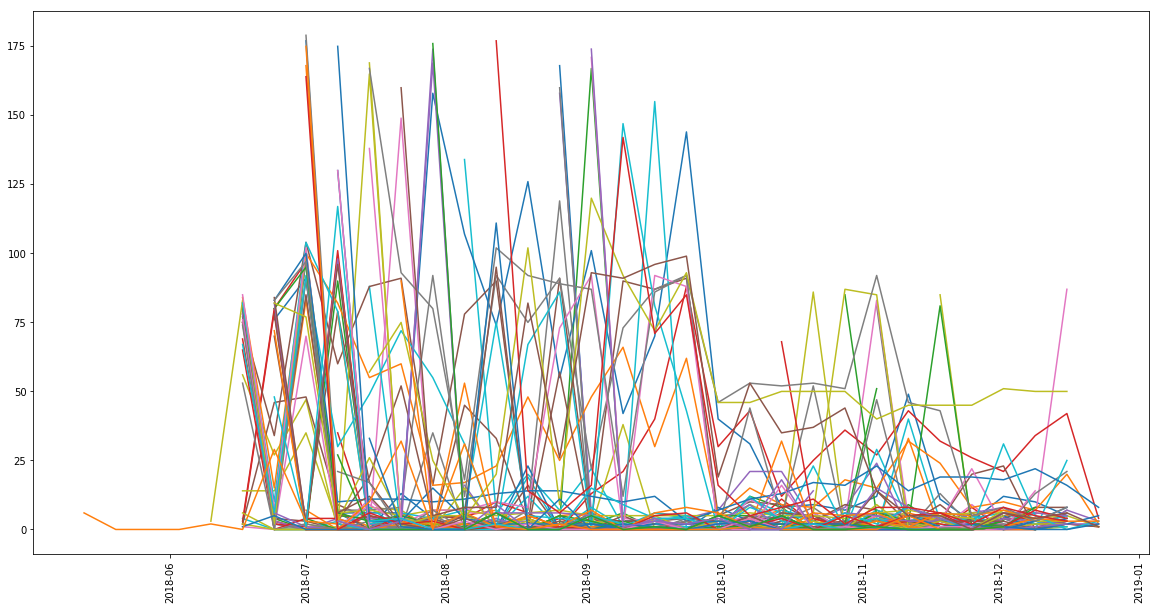

In [27]:
fig=plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
for i in range(len(activitydf['user'])):
    plt.plot(activitydf['activity'][i])

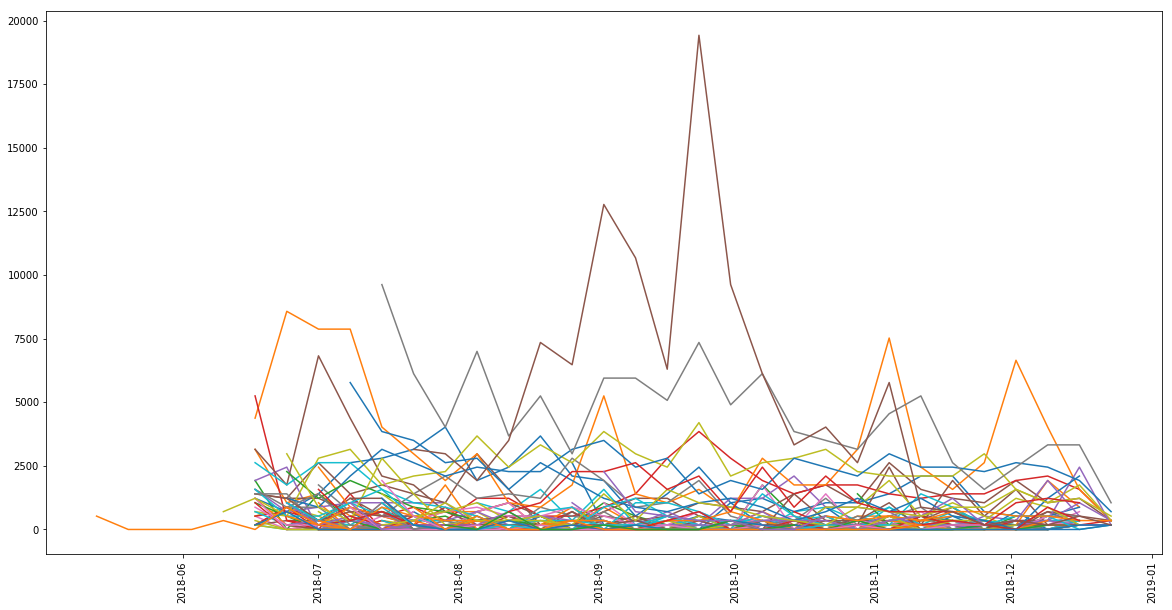

In [28]:
fig=plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
for i in range(len(logindf['user'])):
    plt.plot(logindf['logins'][i])